In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.1.5'

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [5]:
cm=pd.read_csv("count_matrix.csv")
cm.rename(columns={"subject": "sample"},inplace=True)

In [6]:
cm['subject']=cm['sample'].astype(str).str[0:7]

In [7]:
cm.shape

(274, 59)

In [8]:
cm.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_E paired human Q20 aligned,SVA_F unpaired reads aligned,SVA_F unpaired human Q00 aligned,SVA_F unpaired human Q10 aligned,SVA_F unpaired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q00 aligned,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,subject
0,02-2483-01A,566024474,5217,5099,2910,2894,3558,1493,1345,1328,...,4581,12823,11788,4762,4719,8134,2632,2216,2170,02-2483
1,02-2483-10A,579304076,4735,4646,2687,2673,3338,1474,1333,1308,...,4016,10290,9529,3830,3791,6732,2296,1910,1878,02-2483
2,02-2485-01A,575060540,5140,5047,2904,2892,3782,1671,1547,1523,...,4690,11766,10748,4482,4433,8146,2701,2262,2217,02-2485
3,02-2485-10A,478851061,3895,3849,2229,2221,2564,1162,1073,1061,...,3959,8731,8061,3293,3252,6392,2246,1893,1860,02-2485
4,06-0125-01A,1066268796,8464,8384,4874,4853,5920,2720,2538,2514,...,10953,24154,22406,9480,9421,17454,6553,5567,5507,06-0125


In [9]:
cm[['subject','sample']].head()

,subject,sample
0,02-2483,02-2483-01A
1,02-2483,02-2483-10A
2,02-2485,02-2485-01A
3,02-2485,02-2485-10A
4,06-0125,06-0125-01A


In [10]:
mt=pd.read_csv("metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['submitter','days_to_death','gender','disease_type','center_name'])

In [11]:
mt.shape

(127, 5)

In [12]:
mt.head()

,submitter,days_to_death,gender,disease_type,center_name
0,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [13]:
df=cm.merge(mt,left_on='subject',right_on='submitter',suffixes=["_cm","_mt"],how='outer')

In [14]:
df.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_F paired reads aligned,SVA_F paired human Q00 aligned,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,subject,submitter,days_to_death,gender,disease_type,center_name
0,02-2483-01A,566024474,5217,5099,2910,2894,3558,1493,1345,1328,...,8134,2632,2216,2170,02-2483,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,02-2483-10A,579304076,4735,4646,2687,2673,3338,1474,1333,1308,...,6732,2296,1910,1878,02-2483,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,02-2485-01A,575060540,5140,5047,2904,2892,3782,1671,1547,1523,...,8146,2701,2262,2217,02-2485,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,02-2485-10A,478851061,3895,3849,2229,2221,2564,1162,1073,1061,...,6392,2246,1893,1860,02-2485,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,06-0125-01A,1066268796,8464,8384,4874,4853,5920,2720,2538,2514,...,17454,6553,5567,5507,06-0125,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [15]:
df.shape

(279, 64)

In [16]:
df['normalized HERVK113 unpaired human Q00 aligned']=df['HERVK113 unpaired human Q00 aligned']/df['raw pair count']

In [17]:
df['normalized HERVK113 unpaired human Q20 aligned']=df['HERVK113 unpaired human Q20 aligned']/df['raw pair count']

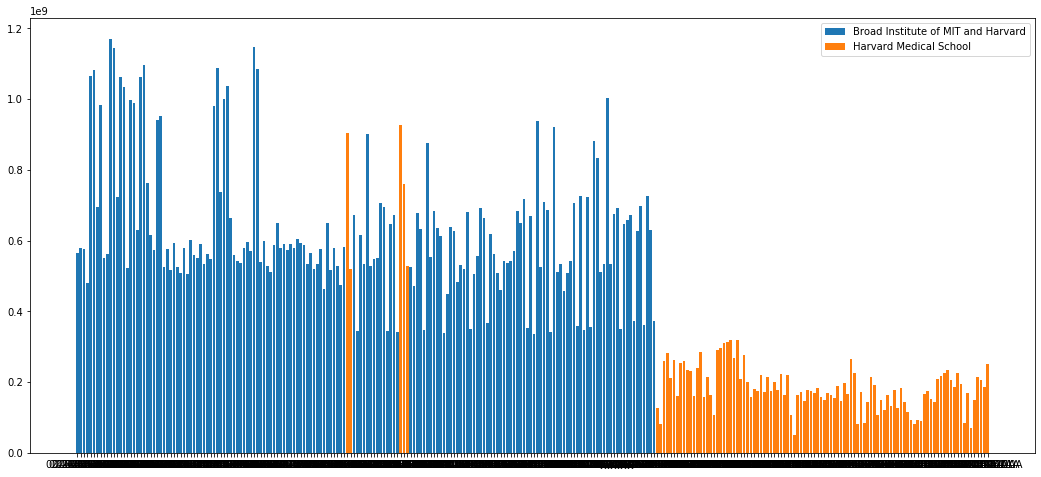

In [18]:
groups = df.groupby('center_name')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['raw pair count'], label=name)
ax.legend()

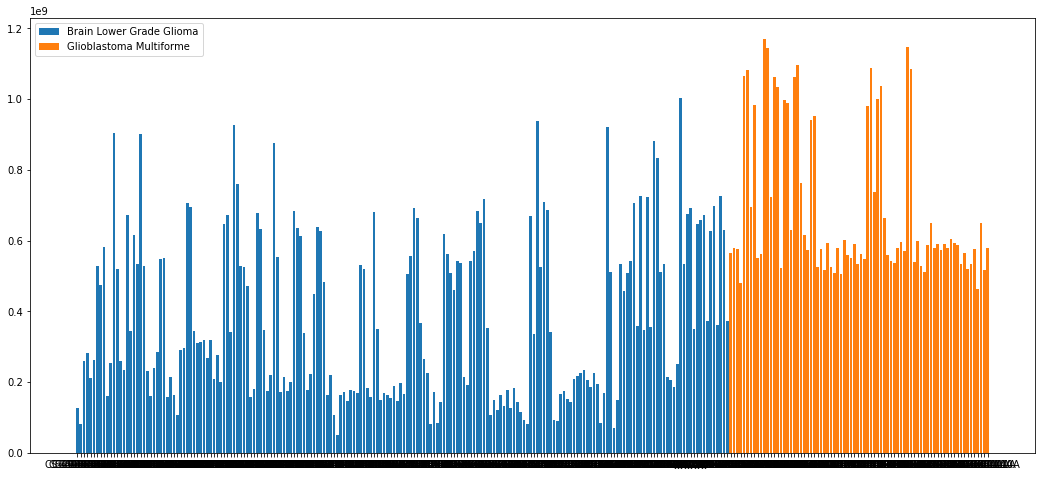

In [19]:
groups = df.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['raw pair count'], label=name)
ax.legend()

In [20]:
tumor=df[df['sample'].str.contains("-01.$")].copy()

In [21]:
tumor.shape

(125, 66)

In [22]:
tumor.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,subject,submitter,days_to_death,gender,disease_type,center_name,normalized HERVK113 unpaired human Q00 aligned,normalized HERVK113 unpaired human Q20 aligned
0,02-2483-01A,566024474,5217,5099,2910,2894,3558,1493,1345,1328,...,2216,2170,02-2483,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000009,0.000005
2,02-2485-01A,575060540,5140,5047,2904,2892,3782,1671,1547,1523,...,2262,2217,02-2485,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000009,0.000005
4,06-0125-01A,1066268796,8464,8384,4874,4853,5920,2720,2538,2514,...,5567,5507,06-0125,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000008,0.000005
8,06-0157-01A,551037711,5322,5247,3005,2996,3280,1465,1361,1338,...,2611,2576,06-0157,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000010,0.000005
10,06-0171-01A,1170585350,9069,8940,5227,5190,6420,2949,2719,2672,...,5768,5693,06-0171,06-0171,399.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000008,0.000004


In [23]:
normal=df[df['sample'].str.contains("-10.$")].copy()

In [24]:
normal.shape

(125, 66)

In [25]:
normal.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,subject,submitter,days_to_death,gender,disease_type,center_name,normalized HERVK113 unpaired human Q00 aligned,normalized HERVK113 unpaired human Q20 aligned
1,02-2483-10A,579304076,4735,4646,2687,2673,3338,1474,1333,1308,...,1910,1878,02-2483,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000008,0.000005
3,02-2485-10A,478851061,3895,3849,2229,2221,2564,1162,1073,1061,...,1893,1860,02-2485,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000008,0.000005
6,06-0125-10A,695377506,5184,5103,2905,2892,3778,1643,1520,1494,...,2785,2748,06-0125,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000007,0.000004
9,06-0157-10A,561676819,4434,4345,2471,2458,3040,1303,1195,1179,...,2059,2022,06-0157,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000008,0.000004
12,06-0171-10A,721570484,5428,5302,3065,3048,3472,1440,1322,1306,...,2383,2350,06-0171,06-0171,399.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000007,0.000004




# Raw counts


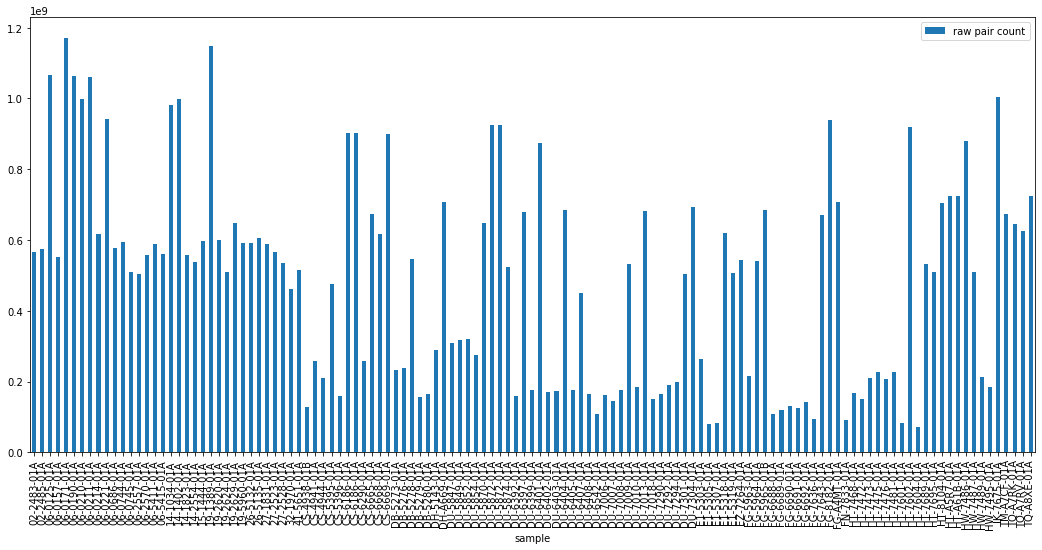

In [26]:
tumor.plot(x='sample',y='raw pair count',kind='bar')

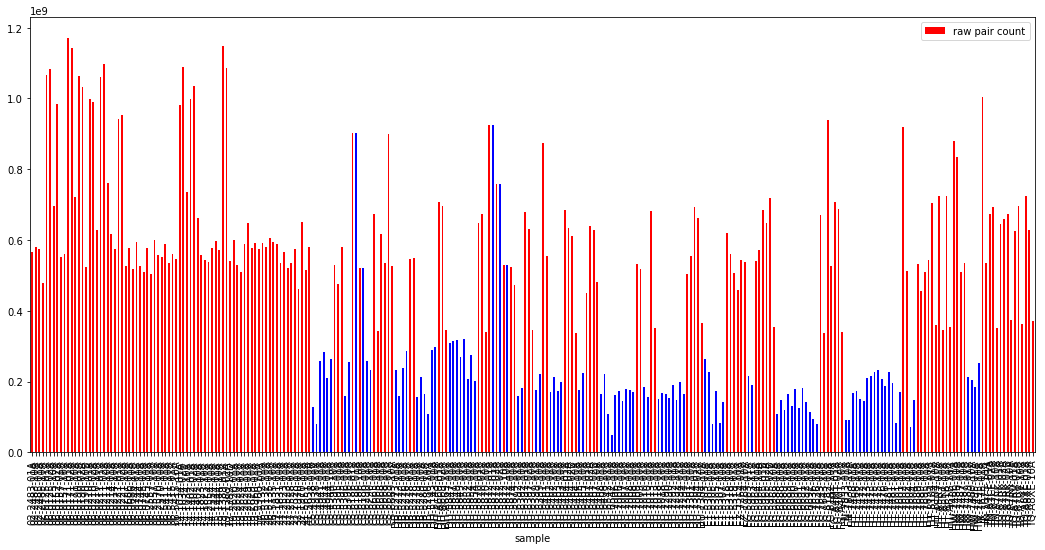

In [27]:
colors={'Broad Institute of MIT and Harvard':'r', 'Harvard Medical School':'b'}
df.plot(x='sample',y='raw pair count',kind='bar', color=[colors[i] for i in df['center_name']])

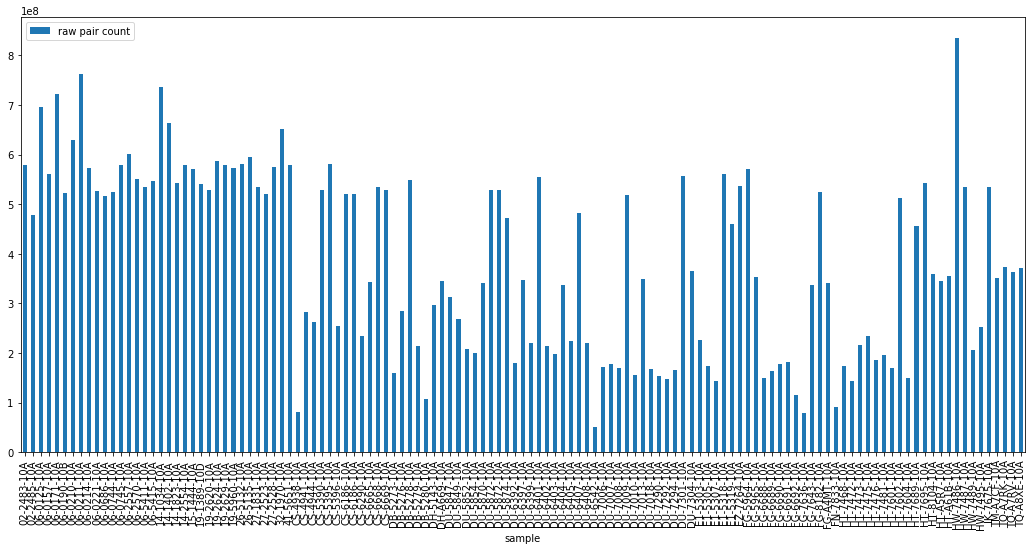

In [28]:
normal.plot(x='sample',y='raw pair count',kind='bar')

In [29]:
normal['subject']

1      02-2483
3      02-2485
6      06-0125
9      06-0157
12     06-0171
        ...   
265    IK-7675
268    TM-A7CF
272    TQ-A7RK
275    TQ-A7RV
278    TQ-A8XE
Name: subject, Length: 125, dtype: object

In [30]:
tumor['subject']

0      02-2483
2      02-2485
4      06-0125
8      06-0157
10     06-0171
        ...   
264    IK-7675
266    TM-A7CF
269    TQ-A7RK
273    TQ-A7RV
276    TQ-A8XE
Name: subject, Length: 125, dtype: object

## Tumor Normal comparison

In [31]:
#tn=normal.join(tumor,on='subject',lsuffix="_normal",rsuffix="_tumor",how='outer')
tn=normal.merge(tumor,on='subject',suffixes=["_normal","_tumor"],how='outer')

In [32]:
tn.head()

,sample_normal,raw pair count_normal,HERVK113 unpaired reads aligned_normal,HERVK113 unpaired human Q00 aligned_normal,HERVK113 unpaired human Q10 aligned_normal,HERVK113 unpaired human Q20 aligned_normal,HERVK113 paired reads aligned_normal,HERVK113 paired human Q00 aligned_normal,HERVK113 paired human Q10 aligned_normal,HERVK113 paired human Q20 aligned_normal,...,SVA_F paired human Q00 aligned_tumor,SVA_F paired human Q10 aligned_tumor,SVA_F paired human Q20 aligned_tumor,submitter_tumor,days_to_death_tumor,gender_tumor,disease_type_tumor,center_name_tumor,normalized HERVK113 unpaired human Q00 aligned_tumor,normalized HERVK113 unpaired human Q20 aligned_tumor
0,02-2483-10A,579304076.0,4735.0,4646.0,2687.0,2673.0,3338.0,1474.0,1333.0,1308.0,...,2632.0,2216.0,2170.0,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000009,0.000005
1,02-2485-10A,478851061.0,3895.0,3849.0,2229.0,2221.0,2564.0,1162.0,1073.0,1061.0,...,2701.0,2262.0,2217.0,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000009,0.000005
2,06-0125-10A,695377506.0,5184.0,5103.0,2905.0,2892.0,3778.0,1643.0,1520.0,1494.0,...,6553.0,5567.0,5507.0,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000008,0.000005
3,06-0157-10A,561676819.0,4434.0,4345.0,2471.0,2458.0,3040.0,1303.0,1195.0,1179.0,...,3202.0,2611.0,2576.0,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000010,0.000005
4,06-0171-10A,721570484.0,5428.0,5302.0,3065.0,3048.0,3472.0,1440.0,1322.0,1306.0,...,6913.0,5768.0,5693.0,06-0171,399.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000008,0.000004


In [33]:
tn[['subject','sample_normal','raw pair count_normal','sample_tumor','raw pair count_tumor']].head()

,subject,sample_normal,raw pair count_normal,sample_tumor,raw pair count_tumor
0,02-2483,02-2483-10A,579304076.0,02-2483-01A,5.660245e+08
1,02-2485,02-2485-10A,478851061.0,02-2485-01A,5.750605e+08
2,06-0125,06-0125-10A,695377506.0,06-0125-01A,1.066269e+09
3,06-0157,06-0157-10A,561676819.0,06-0157-01A,5.510377e+08
4,06-0171,06-0171-10A,721570484.0,06-0171-01A,1.170585e+09


In [34]:
plt.rcParams["figure.figsize"] = [18.0,18.0]

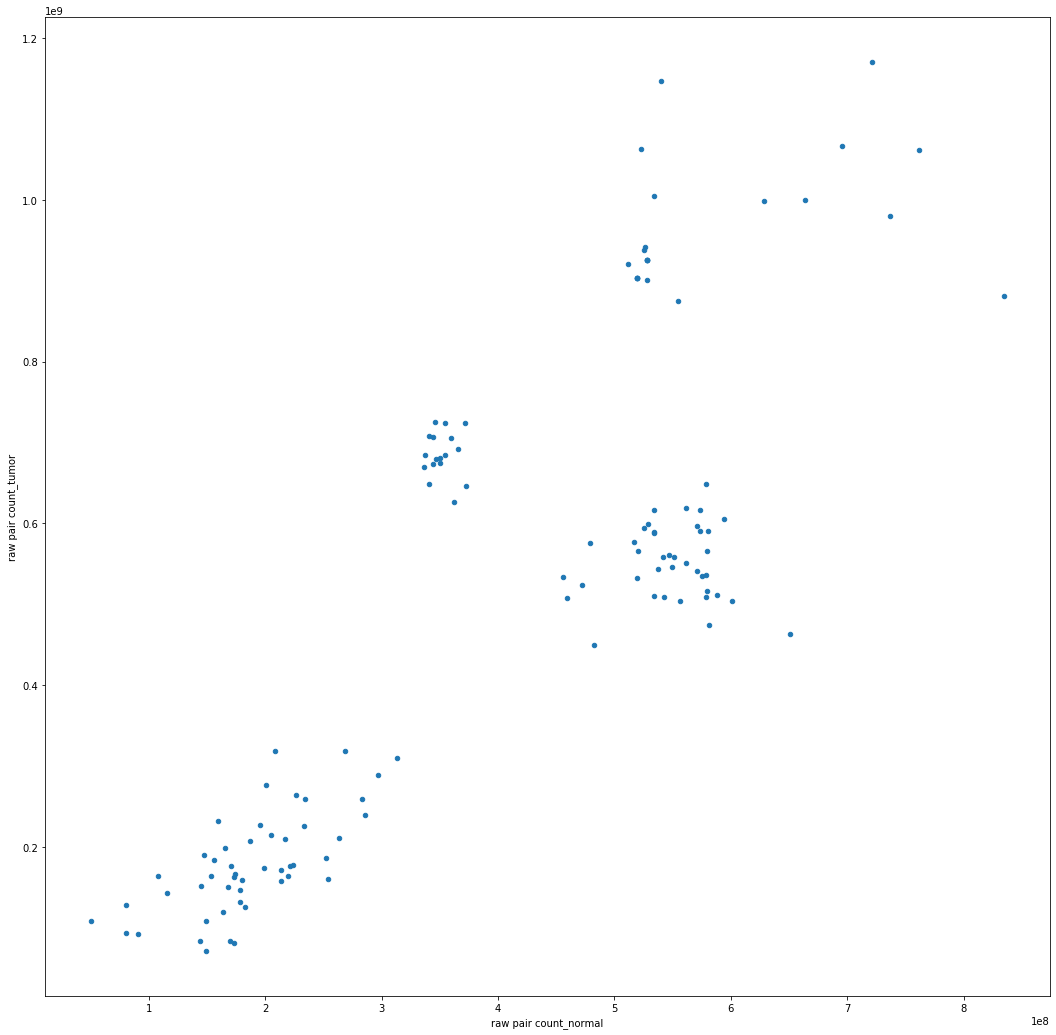

In [35]:
# days_to_death	gender	disease_type	center_name
tn.plot(x='raw pair count_normal',y='raw pair count_tumor',kind='scatter')

/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


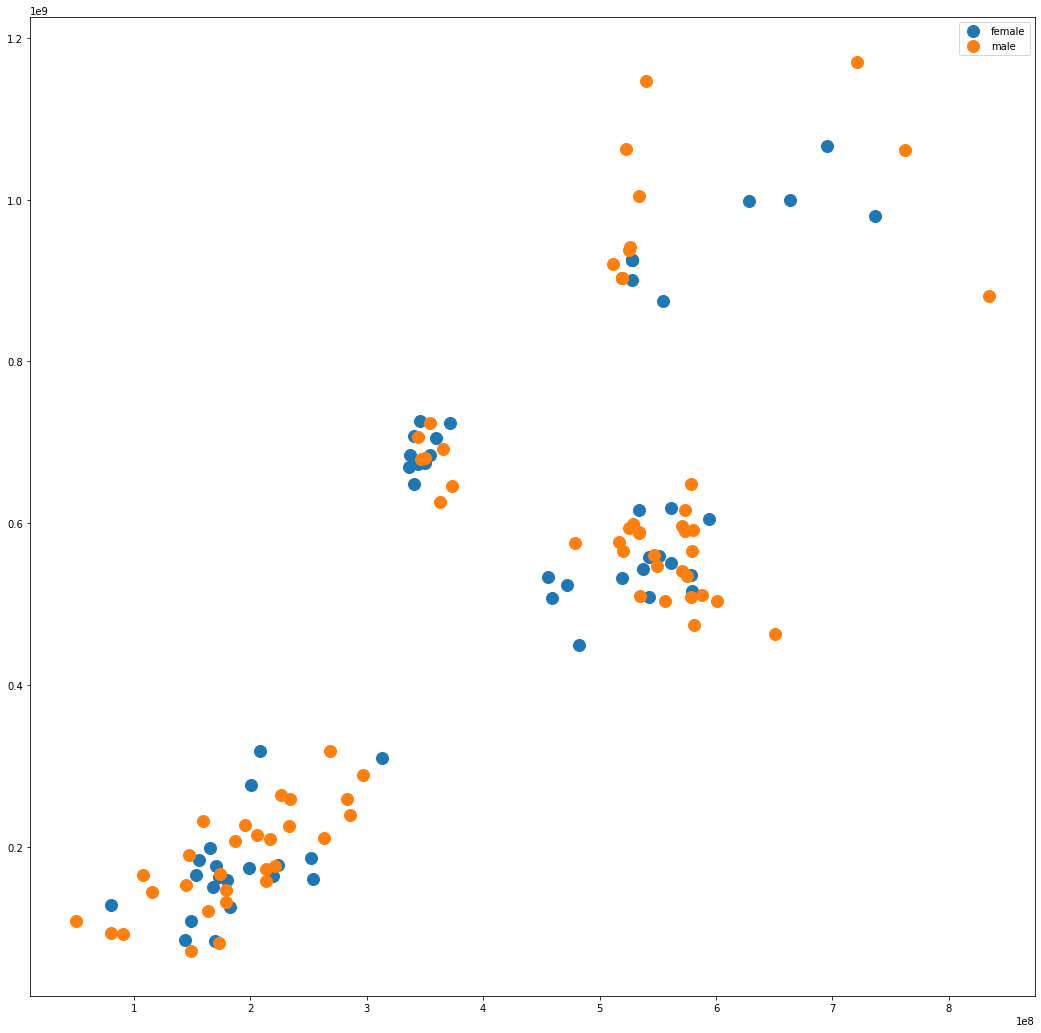

In [36]:
groups = tn.groupby('gender_normal')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['raw pair count_normal'],group['raw pair count_tumor'],
        marker='o', linestyle='', ms=12, label=name)
ax.legend()

/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


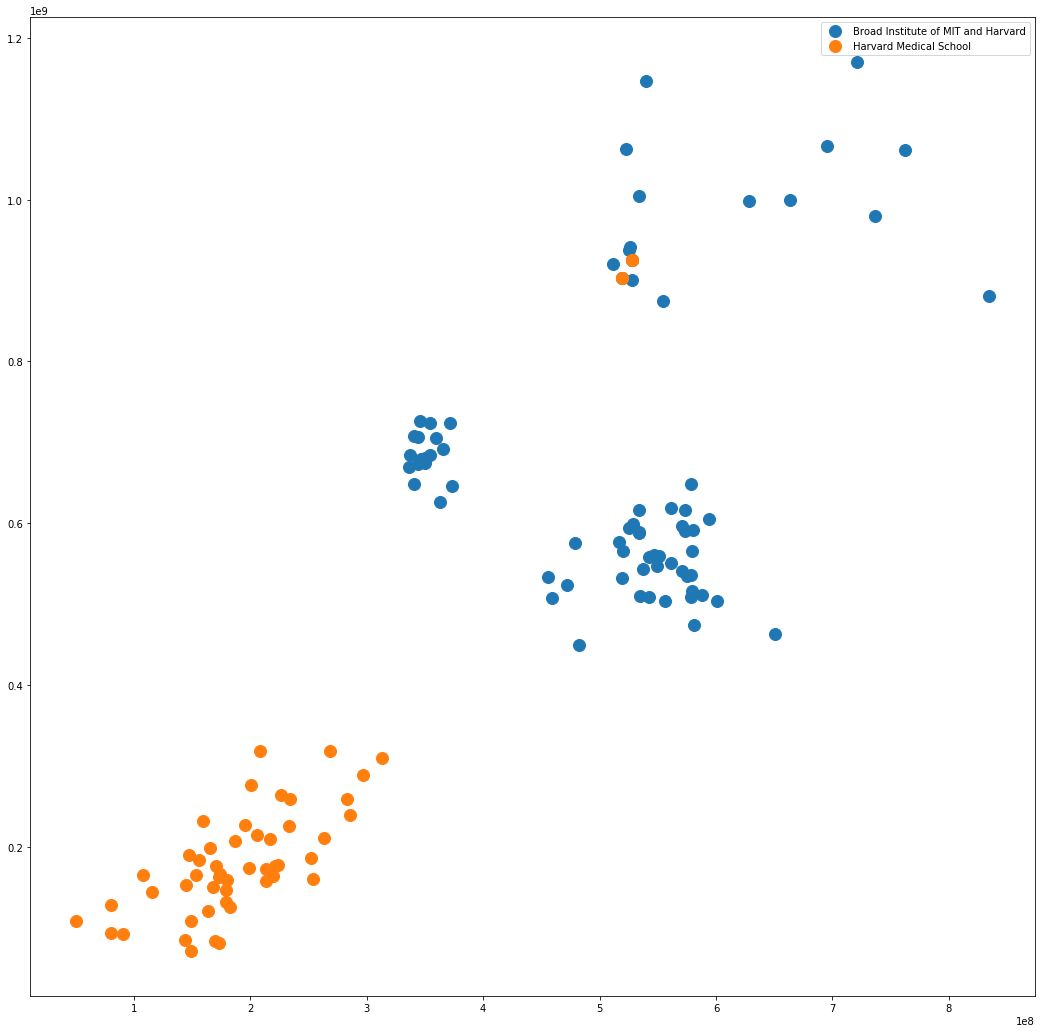

In [37]:
groups = tn.groupby('center_name_normal')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['raw pair count_normal'],group['raw pair count_tumor'],
        marker='o', linestyle='', ms=12, label=name)
ax.legend()

/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


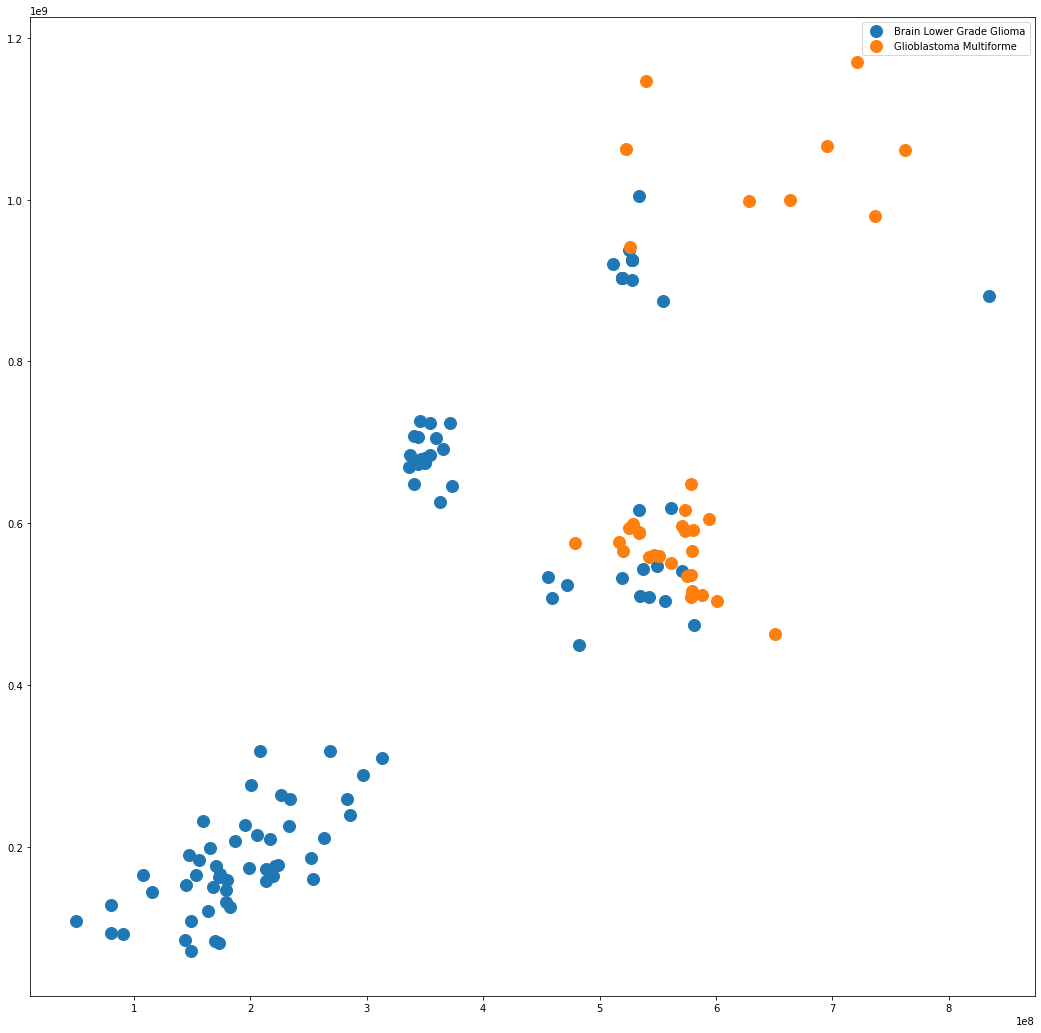

In [38]:
groups = tn.groupby('disease_type_normal')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['raw pair count_normal'],group['raw pair count_tumor'],
        marker='o', linestyle='', ms=12, label=name)
ax.legend()

In [39]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [40]:
tn['raw count ratio']=tn['raw pair count_tumor']/tn['raw pair count_normal']

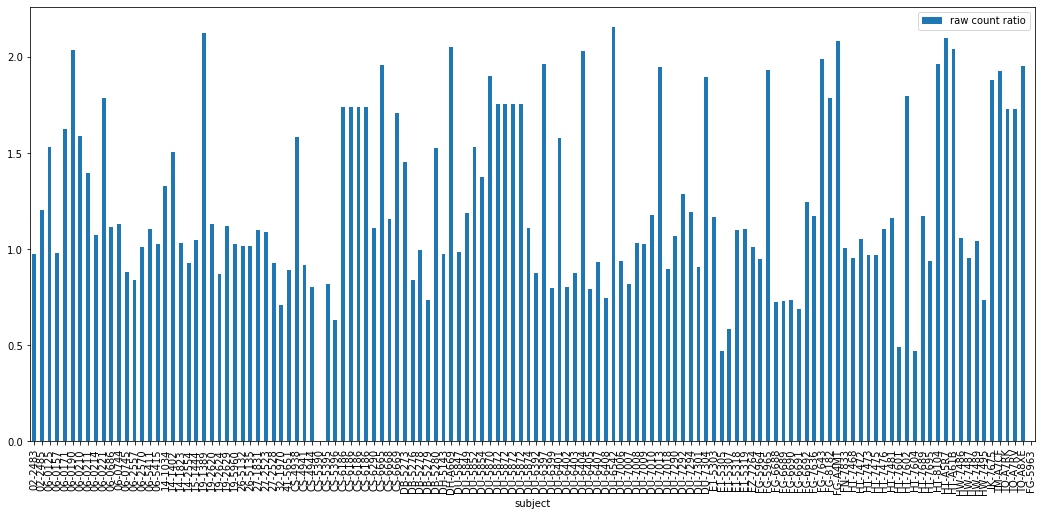

In [41]:
tn.plot(x='subject',y='raw count ratio',kind='bar')

In [42]:
df[df['subject']=='CS-5390']

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,subject,submitter,days_to_death,gender,disease_type,center_name,normalized HERVK113 unpaired human Q00 aligned,normalized HERVK113 unpaired human Q20 aligned
84,CS-5390-10A,529225224,4273,4213,2422,2419,2814,1269,1180,1161,...,1310,1290,CS-5390,CS-5390,NaN,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,0.000008,0.000005




# Below are plots of total HERV insertion counts



In [43]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

## Tumor counts

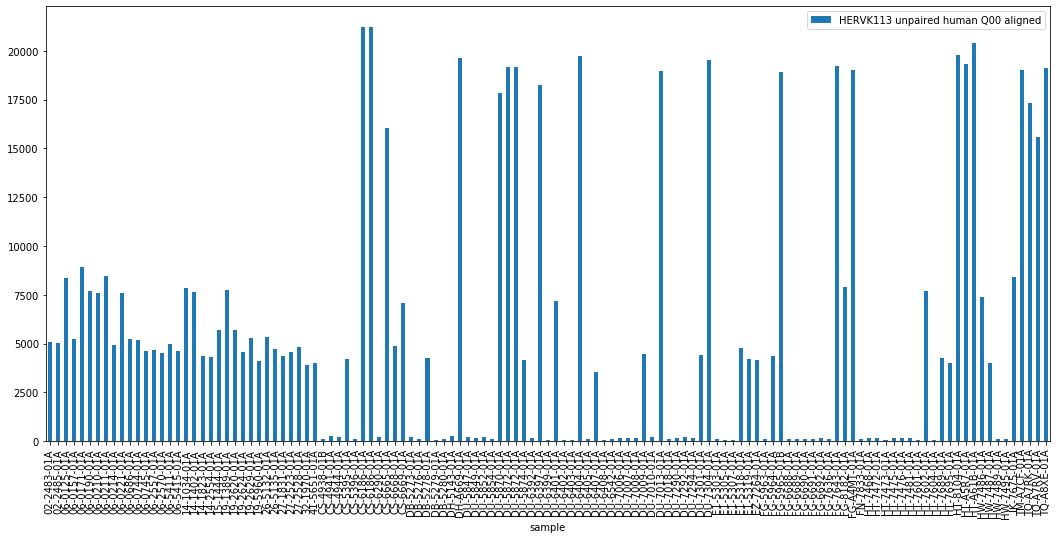

In [44]:
tumor.plot(x='sample',y='HERVK113 unpaired human Q00 aligned',kind='bar')

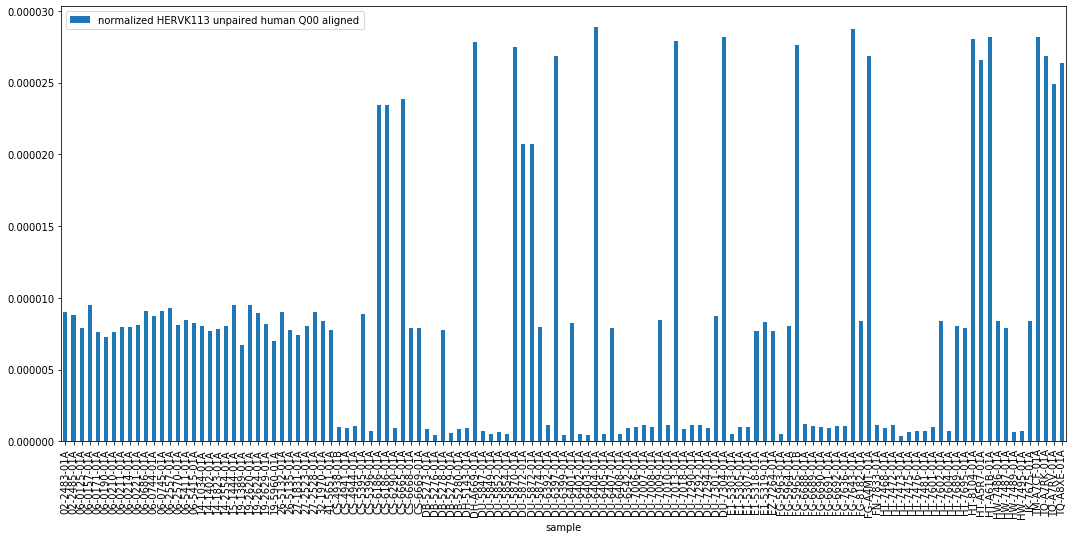

In [45]:
tumor.plot(x='sample',y='normalized HERVK113 unpaired human Q00 aligned',kind='bar')

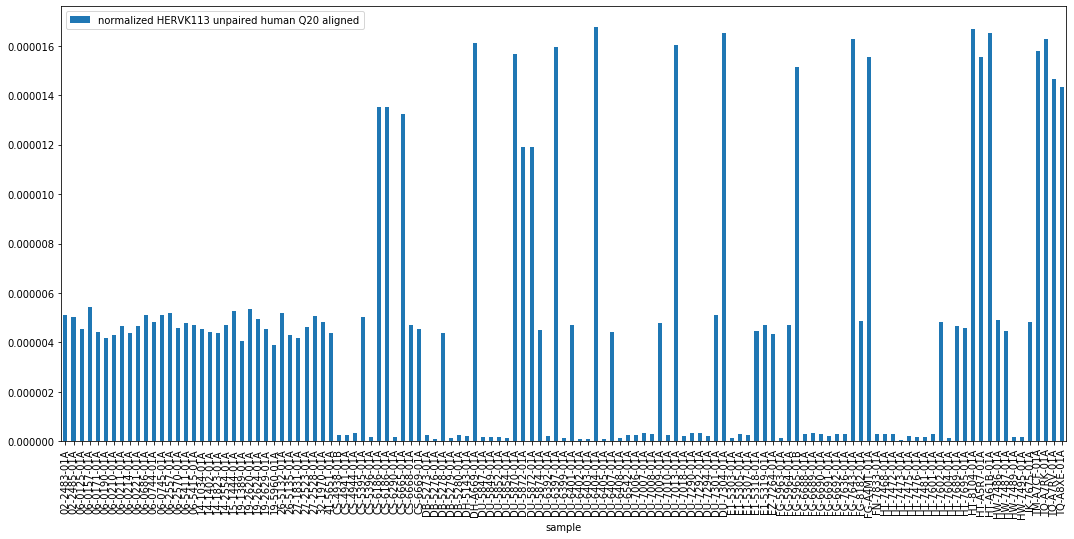

In [46]:
tumor.plot(x='sample',y='normalized HERVK113 unpaired human Q20 aligned',kind='bar')

## Normal HERV counts

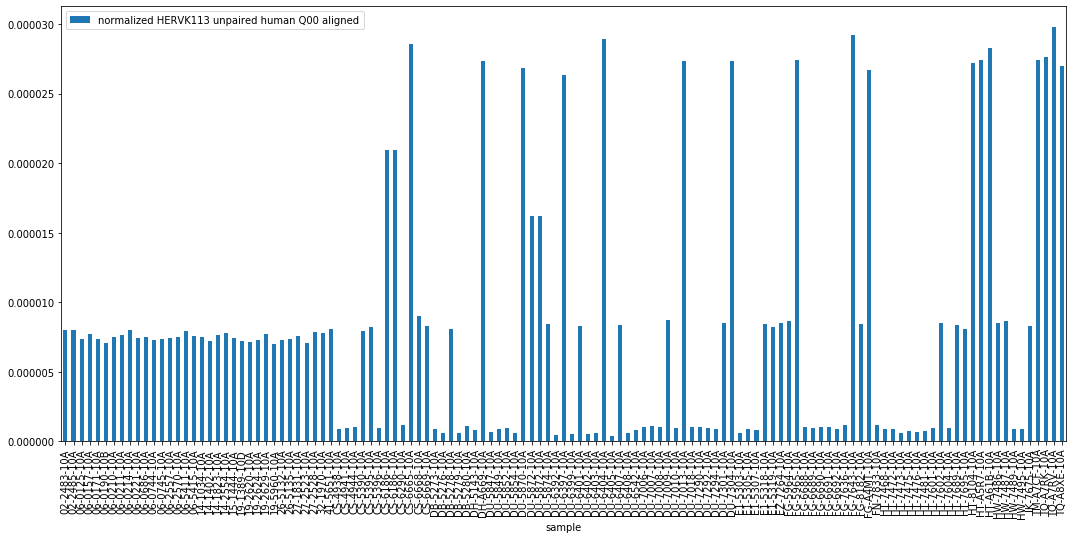

In [47]:
normal.plot(x='sample',y='normalized HERVK113 unpaired human Q00 aligned',kind='bar')

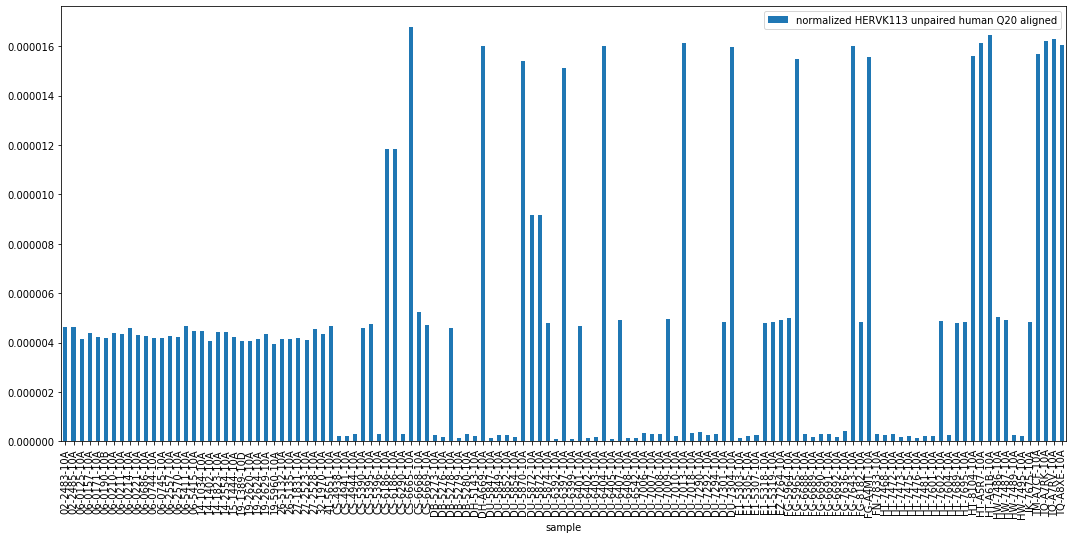

In [48]:
normal.plot(x='sample',y='normalized HERVK113 unpaired human Q20 aligned',kind='bar')

In [49]:
normal.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,subject,submitter,days_to_death,gender,disease_type,center_name,normalized HERVK113 unpaired human Q00 aligned,normalized HERVK113 unpaired human Q20 aligned
1,02-2483-10A,579304076,4735,4646,2687,2673,3338,1474,1333,1308,...,1910,1878,02-2483,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000008,0.000005
3,02-2485-10A,478851061,3895,3849,2229,2221,2564,1162,1073,1061,...,1893,1860,02-2485,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000008,0.000005
6,06-0125-10A,695377506,5184,5103,2905,2892,3778,1643,1520,1494,...,2785,2748,06-0125,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000007,0.000004
9,06-0157-10A,561676819,4434,4345,2471,2458,3040,1303,1195,1179,...,2059,2022,06-0157,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000008,0.000004
12,06-0171-10A,721570484,5428,5302,3065,3048,3472,1440,1322,1306,...,2383,2350,06-0171,06-0171,399.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,0.000007,0.000004


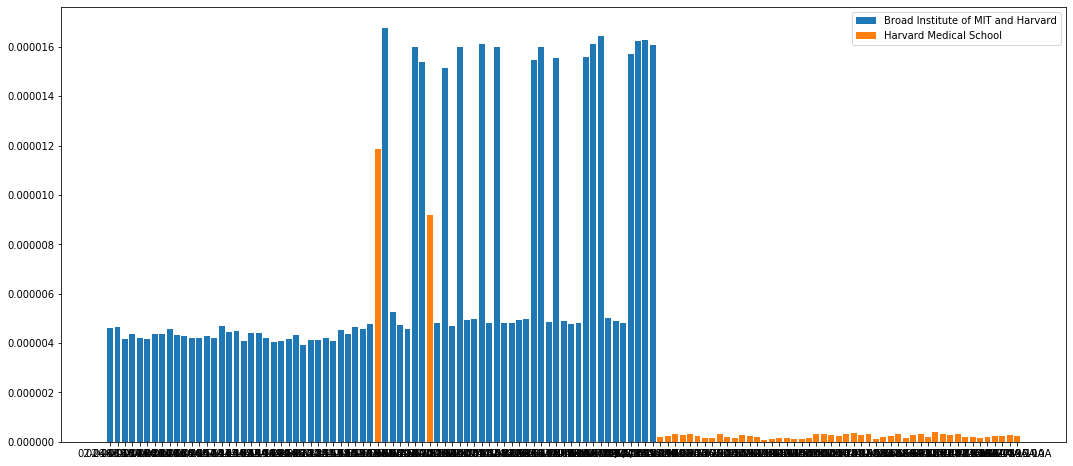

In [50]:
groups = normal.groupby('center_name')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['normalized HERVK113 unpaired human Q20 aligned'], label=name)
ax.legend()

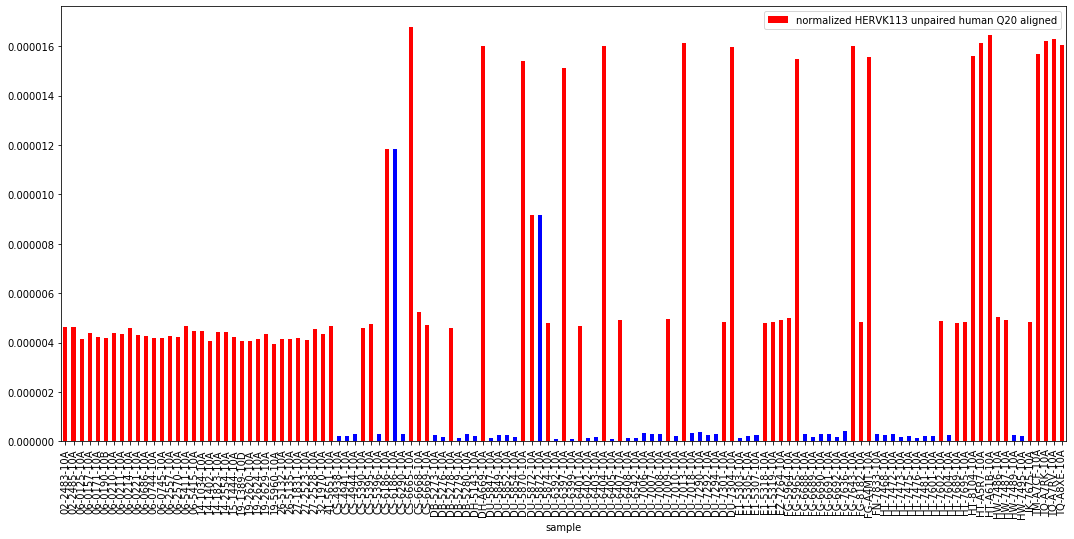

In [51]:
colors={'Broad Institute of MIT and Harvard':'r', 'Harvard Medical School':'b'}
normal.plot(x='sample',y='normalized HERVK113 unpaired human Q20 aligned',kind='bar', color=[colors[i] for i in normal['center_name']])